# Wine Clustering Project

### Main Objective

The project will be focused on clustering the different types of wine of the dataset using unsupervised techniques. There is a target column, this would not be used for the clustering models and only be used at the end for the metrics to compare the different methods. The benefit that this analysis could bring is an automated way to group the different types of wine that the company sells and make the labeling process easier and faster.

We are going to use multiple metrics to check what could be the best clustering aproach for this project (Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index, Adjusted Rand Index and Mutual Information)

### Clustering Metrics
- <b>Silhouette Score:</b> evaluates how well-defined the clusters are, where the higher the score in a range from -1 to 1, the better-defined are the clusters.

- <b>Davies-Bouldin Index:</b> evaluates the clusters compactness and separation, where the lower the index, the better-defined are the clusters.

- <b>Calinski-Harabasz Index:</b> evaluates the quality of the clusters, finding the relationship between the dispesion between the clusters and the dispersions within the clusters, the higher the index, the better-defined are the clusters.

- <b>Adjusted Rand Index:</b> evaluates the similarity between two groups, in this case the true values that are in the target and the predicted values of the cluster model, the higher the index, the greater the similarity between the two groups.

- <b>Mutual Information:</b> evaluates the amount of information shared between two groups, in this case the true values that are in the target and the predicted values of the cluster model, measures if the clustering method manages to capture the underlying structure of the data, the higher the score, the greater is the shared information.

### Importing Libraries

In [35]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, mutual_info_score, adjusted_rand_score 
from sklearn.preprocessing import  MinMaxScaler
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import seaborn as sns

### Functions
Some functions to get the elbow curve, clustering metrics and visualize the clusters.

In [36]:
def elbow_curve(data):
    distorsions = []
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        distorsions.append(kmeans.inertia_)
        
    plt.figure(figsize=(15, 5))
    plt.plot(range(2, 20), distorsions)
    plt.grid(True)
    plt.title('Elbow curve')
    plt.show()
    
def clustering_metrics(X, target, labels):
    silhouette = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    ch_index = calinski_harabasz_score(X, labels)
    ari = adjusted_rand_score(target, labels)
    mi = mutual_info_score(target, labels)

    print(f"Silhouette Score: {silhouette:.2f}")
    print(f"Davies-Bouldin Index: {db_index:.2f}")
    print(f"Calinski-Harabasz Index: {ch_index:.2f}")
    print(f"Adjusted Rand Index: {ari:.2f}")
    print(f"Mutual Information (MI): {mi:.2f}")

def scatter_clusters(X, labels):
    plt.figure()
    scatter = sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette='deep')
    scatter.legend_.set_title('Clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


### Importing Dataset

In [37]:
wine = fetch_ucirepo(id=109)  

data = pd.DataFrame(wine.data.features)
target = pd.DataFrame(wine.data.targets)

data.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

There is no null values in the dataset

### About the Data
The dataset contains different characteristics of wines have.
#### Columns
- Alcohol: wine alcohol percentage.

- Malicacid: one of the principal acids in wine grapes.

- Ash: ash content in the wine after igniting the residue left after the evaporation.

- Alcalinity_of_ash: the level of alkalinity in the ash.

- Magnesium: magnesium content in the wine.

- Total_phenols: polyphenol content in the wine.

- Flavanoids: flavonoid polyphenol content in the wine.

- Nonflavanoid_phenols: non-flavonoid polyphenol content in the wine.

- Proanthocyanins: proanthocyanins flavonoid content in the wine.

- Color_intensity: wine color intensity.

- Hue: wine hue.

- 0D280_0D315_of_diluted_wines

- Proline: proline content in the wine.

First we are going to use the MinMaxScaler to scale all the data, this is done because the measurements of the colums are in different scales.


In [39]:
scaler = MinMaxScaler()

for col in data.columns:
    data[col] = scaler.fit_transform(data[[col]]).squeeze()
    
data.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


Then we examine the skew values, log transform and re-apply the MinMaxScaler

In [40]:
log_columns = data.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

Magnesium          1.098191
Malicacid          1.039651
Color_intensity    0.868585
Proline            0.767822
dtype: float64

In [41]:
data[log_columns.keys()] = data[log_columns.keys()].apply(np.log1p)

for col in data.columns:
    data[col] = scaler.fit_transform(data[[col]]).squeeze()

### Dimensionality Reduction (Kernel PCA)
There are 13 features in the dataset, to make it easier to visualize and interpret the clusters we are going to try to use dimensionality reduction to just 2 dimensions. First we are going to visualize the relationship between the features.

<Figure size 640x480 with 0 Axes>

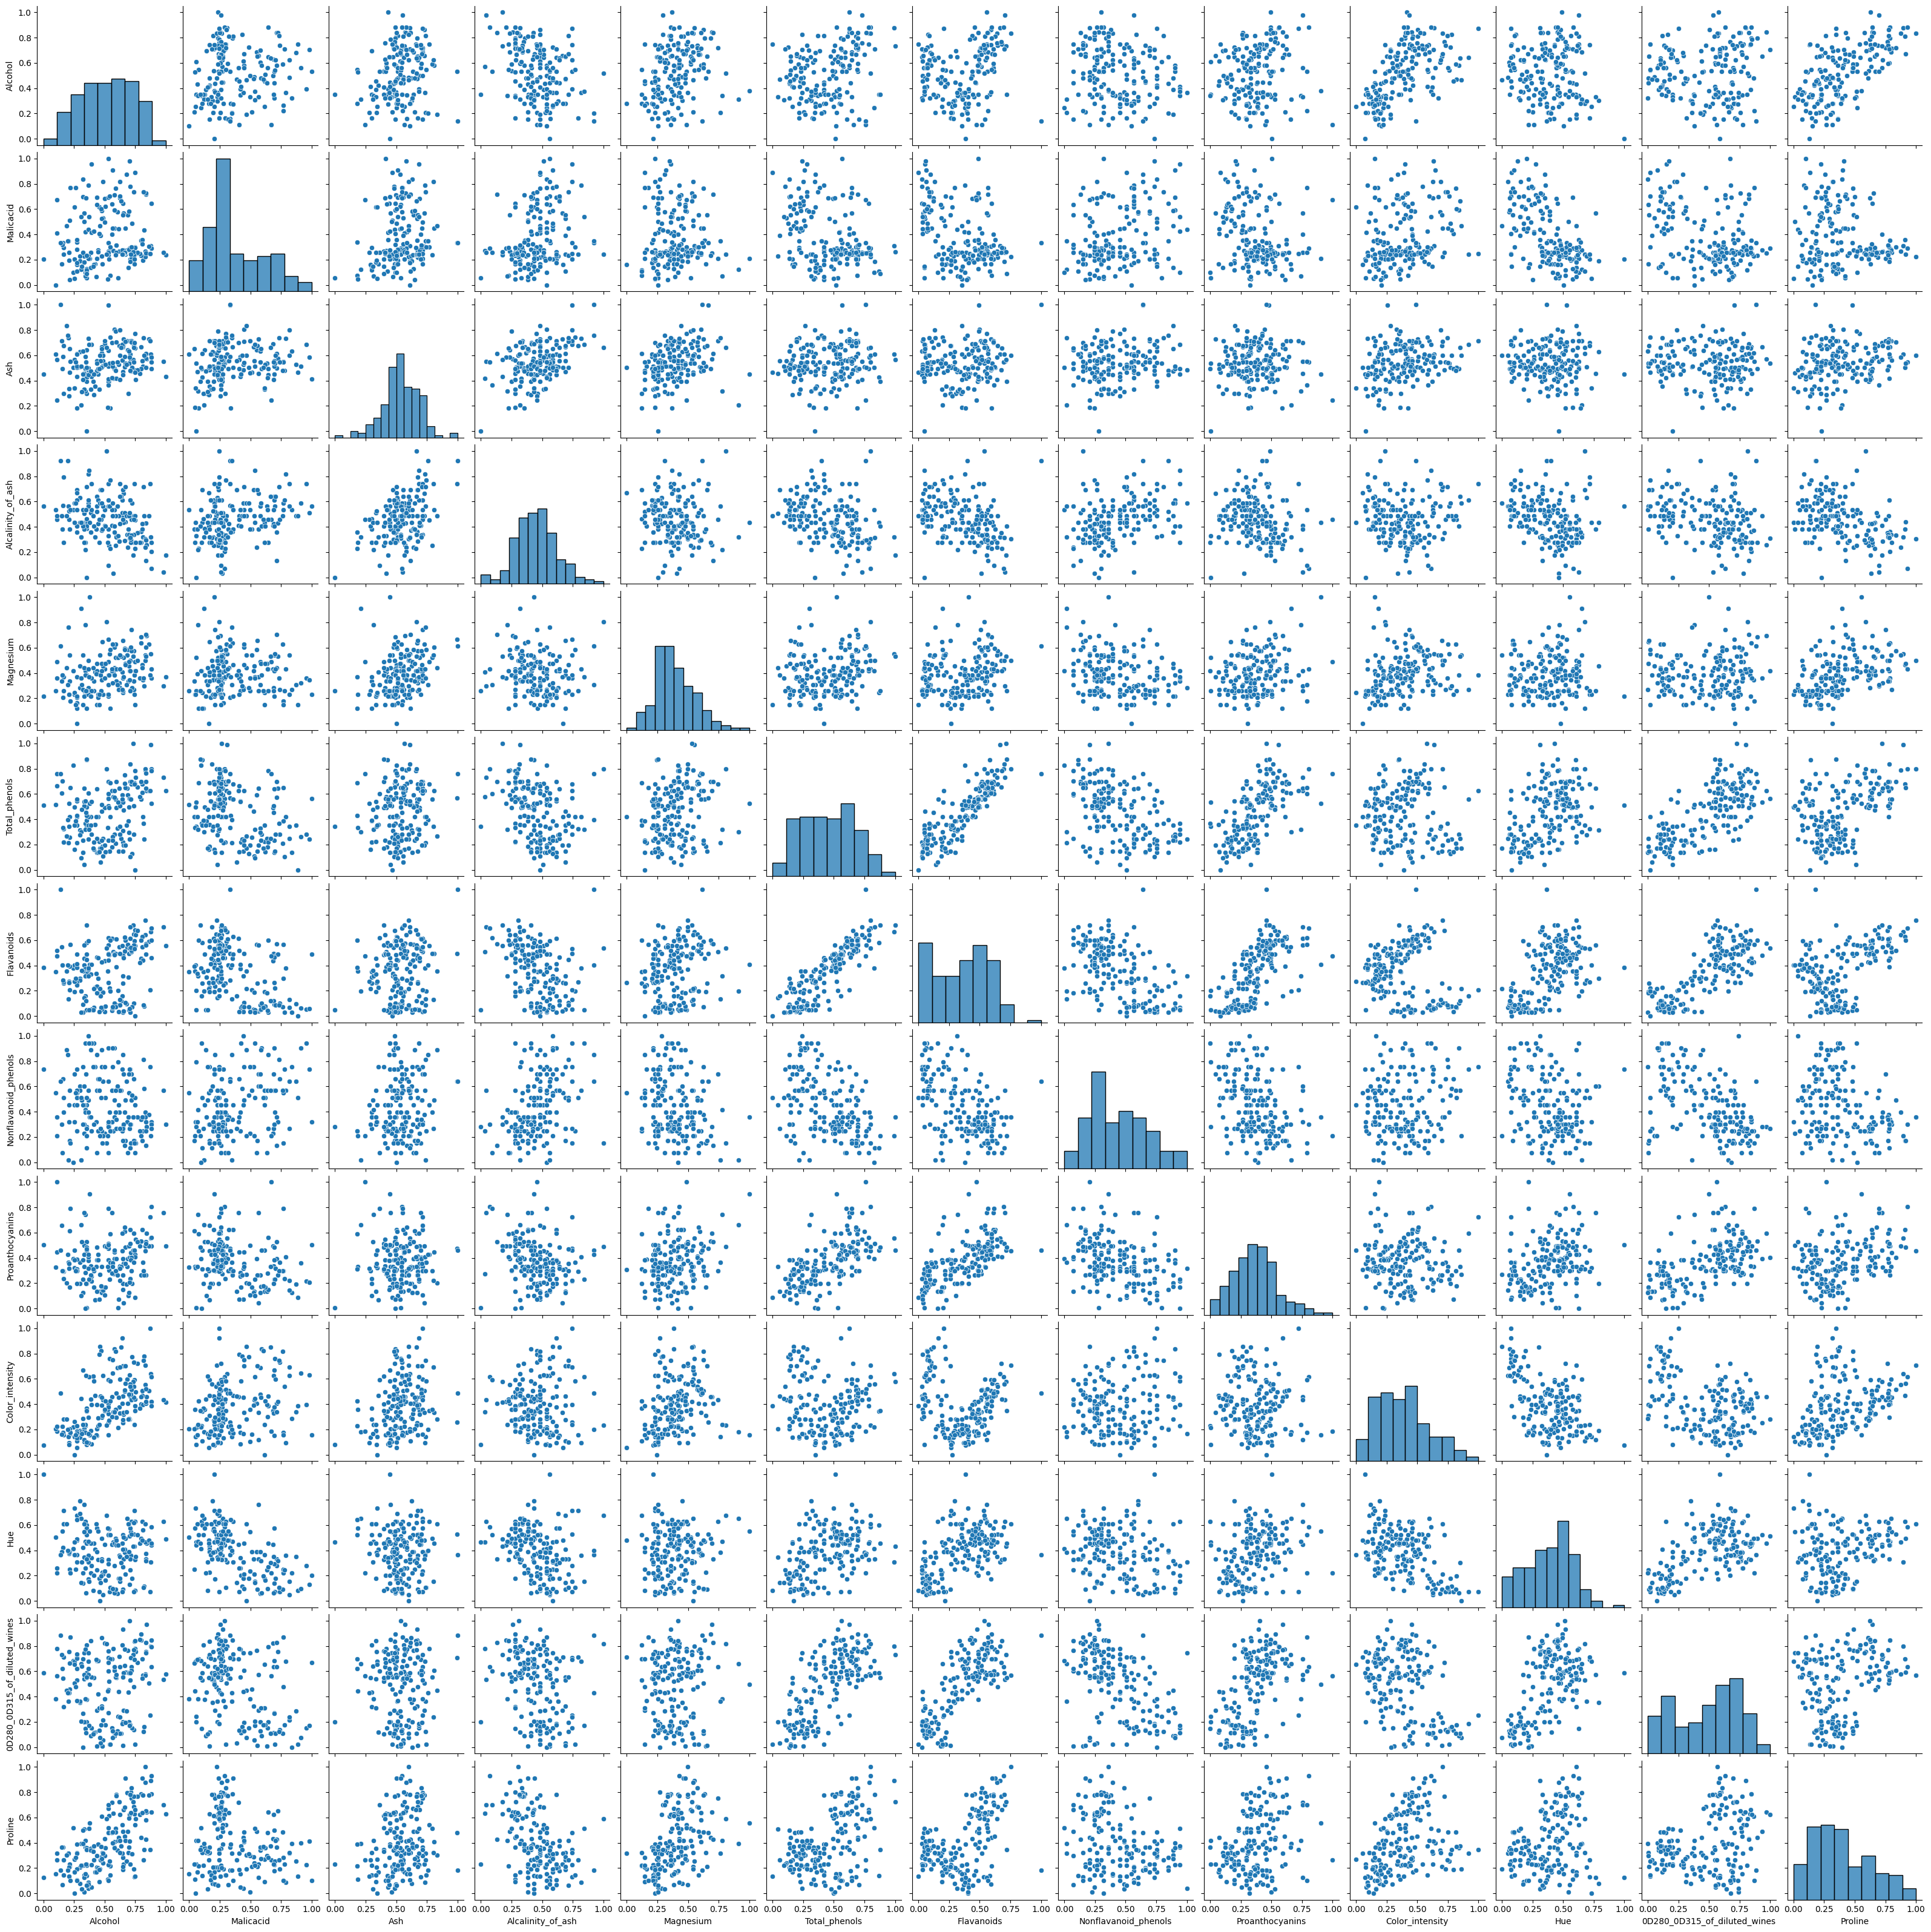

In [42]:
plt.figure()
sns.pairplot(data)
plt.show()

As we can see, there is not a linear relationship between most of the features so we are going to discard using PCA and focus in Kernel PCA.

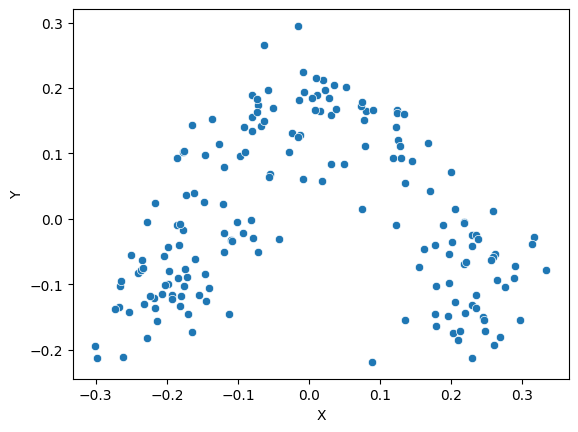

In [43]:
kpca = KernelPCA(n_components=2, kernel='rbf', random_state=42)
X_kpca = kpca.fit_transform(data)

plt.figure()
scatter = sns.scatterplot(x=X_kpca[:,0], y=X_kpca[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

As we can see, there was a non-linear relationship between the features, we can see the data points form an arch in the 2D space.

### Models

#### K-Means
First we are going to use K-Means, because we don't know the amount of clusters, we are going to use the elbow curve function and find out.

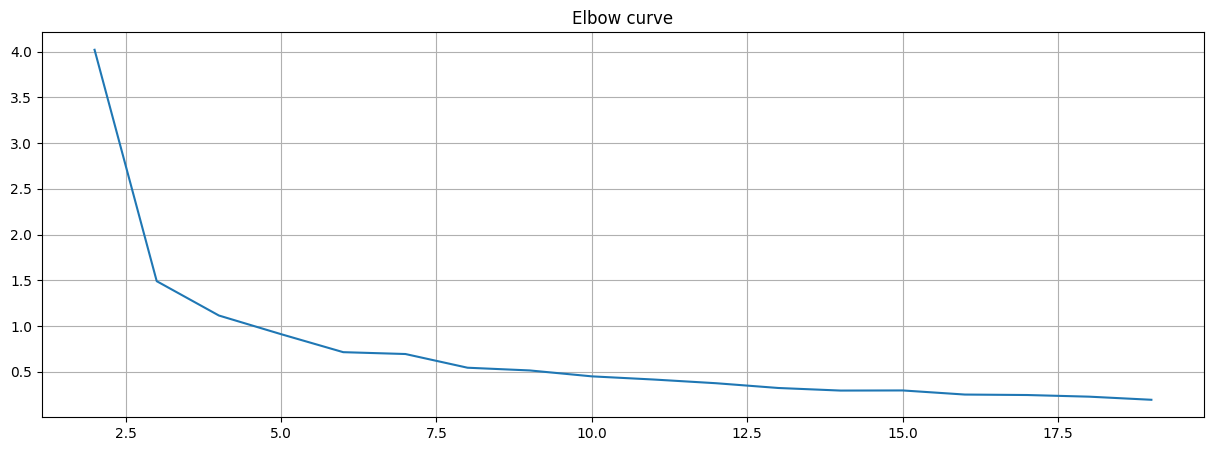

In [44]:
elbow_curve(X_kpca)

We can see a considerable decrease in movement arount three clusters, so we are going to work with that number for the K-Means and the other models.

In [45]:
kmeans = KMeans(random_state=42, n_clusters=3, init='random')
kmeans.fit(X_kpca)

kmeans_labels = kmeans.labels_

Now that it's done we are going to visualize the clusters that we got using the K-Means clustering method.

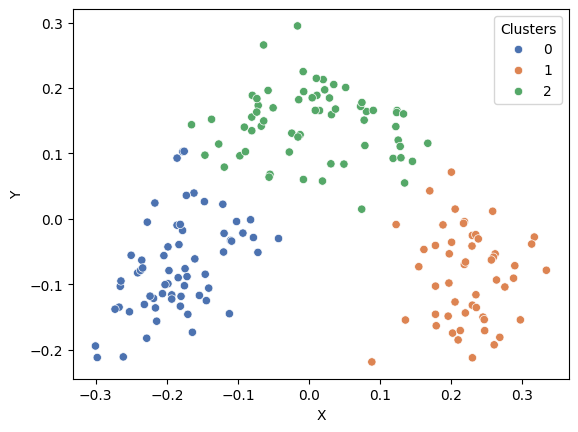

In [46]:
scatter_clusters(X_kpca, kmeans_labels)

We can see the three clusters well defined within the data, no we are going to use the metrics to better analyses how well KMeans did.

In [47]:
clustering_metrics(X_kpca, target['class'], kmeans_labels)

Silhouette Score: 0.58
Davies-Bouldin Index: 0.56
Calinski-Harabasz Index: 398.62
Adjusted Rand Index: 0.86
Mutual Information (MI): 0.92


The silhouette score suggests a reasonably well formed clusters, but maybe no the best ones, on the other hand the Davies-Bouldin index has a low score which means that the clusters are well separated from each other and quiet compact. Calinski-Harabasz index has a really high score which supports the Davies-Bouldin index results of the cluster being of well separated and compact. The ARI says that most of the predicted clusters by K-Means were well aligned with the true values and lastly the MI score says that the true values and the predicted ones shared most of the information.

Overall a great prediction for the K-Means Model.

### Gaussian Mixture (GMM)

Now we are going to use the Gaussian Mixture Model, we are going to pass again three clusters for n_components hyperparameter.

In [48]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_kpca)

gmm_labels = gmm.predict(X_kpca)

Now we are going to visualize the clusters and the get metrics.

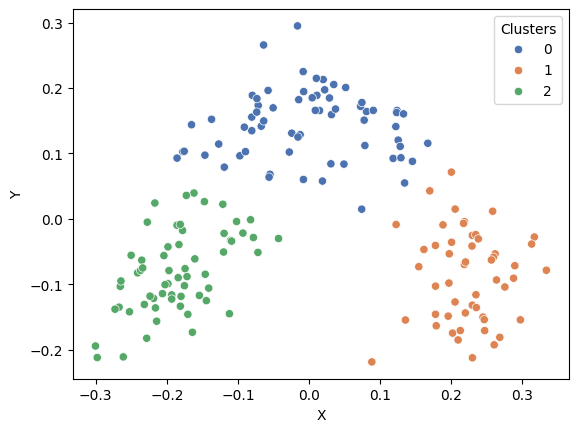

In [49]:
scatter_clusters(X_kpca, gmm_labels)

In [50]:
clustering_metrics(X_kpca, target['class'], gmm_labels)

Silhouette Score: 0.58
Davies-Bouldin Index: 0.56
Calinski-Harabasz Index: 394.85
Adjusted Rand Index: 0.91
Mutual Information (MI): 0.97


Again, we can see three well-defined clusters and the multiple scores are pretty similar of the ones from K-Means, the most relevant changes are the ARI and MI scores, where both jumped 0.5 points, which in a range of -1 to 1 and 0 to 1, it's considerable change.

### Mean Shift

Lastly we are going to use Mean Shift, in this case we don't have a n_clusters hyperparameter, our focus is going to be in the bandwith hyperpameter, to solve this we are going to use the estimate_bandwith function from the sklearn.clusters library.

We can use this method thanks to the lowe amount of n_samples in the dataset, it is recommended to subsample for large dataset though. There are three hyperparameters that we are fill for this method, X, quantile and n_samples. The first and third one are the data and the lenght of it, the second one however controls how narrow or wide the bandwith window will be relative to the data distribution, in this case we are going to put it as 0.2, but the default value is 0.3.

In [51]:
bandwidth = estimate_bandwidth(X_kpca, quantile=0.2, n_samples=len(X_kpca), random_state=42)

Once that we have the bandwith we just need to fit the model and again visualize it and analyze the clustering metrics.

In [52]:
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X_kpca)

ms_labels = ms.labels_

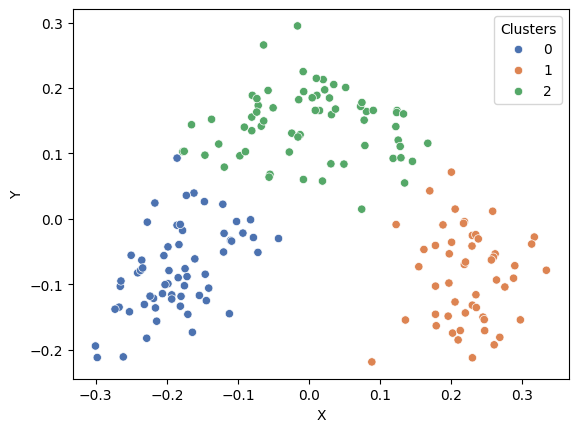

In [53]:
scatter_clusters(X_kpca, ms_labels)

In [54]:
clustering_metrics(X_kpca, target['class'], ms_labels)

Silhouette Score: 0.59
Davies-Bouldin Index: 0.56
Calinski-Harabasz Index: 397.12
Adjusted Rand Index: 0.90
Mutual Information (MI): 0.95


We can see that once again, and this time without defining the n_components, the model predicted three clusters. As for the scores the wasn't a big change with respect to the last two clusters, the ARI and MI scores drop by one and two points respectively and the Calinski-Harabasz Index increase from the GMM, but still lower than K-Means, still all three models have high scores.

### Recommended Model

In this case I'm recommending the Gaussian Mixture Model, even when all three models have very similar scores overall and the distribution of the clusters was, once again very similar. I recommend GMM mainly because the higher Adjusted Rand Index and Mutual Information scores, while the three first metrics measure how good is the overall structure of the clusters, this two scores measures how well did the clusters predicted the actual values and how much information this values and the predictions shared, so the higher the better and with 0.91 and 0.97 we can say the that GMM stands out against the rest of the models.

### Suggestions and Next Steps

We could explore other clustering methods like DBSCAN and Agglomerative Clustering and compare the metrics of each of them with the ones of GMM and see if we can get better results.